In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [6]:
df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [7]:
df.drop(['name','bib','ctz','state','city','country'], 1, inplace=True)

In [8]:
df['gender'].replace(('F', 'M'), (0, 1), inplace=True)

In [9]:
df.dtypes

10k           object
division       int64
25k           object
gender         int64
age            int64
official     float64
genderdiv      int64
35k           object
overall        int64
pace         float64
30k           object
5k            object
half          object
20k           object
40k           object
dtype: object

In [10]:
df = df.replace(to_replace='-',value='0')

In [11]:
columns = ['10k','25k','35k','30k','5k','half','20k','40k']
for column in columns:
    df[column] = df[column].astype(float)

In [12]:
df.dtypes

10k          float64
division       int64
25k          float64
gender         int64
age            int64
official     float64
genderdiv      int64
35k          float64
overall        int64
pace         float64
30k          float64
5k           float64
half         float64
20k          float64
40k          float64
dtype: object

In [13]:
df.describe()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.718298,1932.563032,132.709723,0.550807,42.407079,242.997314,8051.044741,196.648339,15939.587825,9.275658,164.365402,25.713685,111.413195,105.543107,228.722255
std,9.189281,1715.228694,27.758446,0.497420,11.316496,52.300431,4754.005626,42.444377,9232.978224,1.992486,34.427329,4.447068,21.692902,20.209809,49.775681
min,0.000000,1.000000,0.000000,0.000000,18.000000,80.600000,1.000000,0.000000,1.000000,3.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.370000,610.000000,115.100000,0.000000,33.000000,205.527500,3972.000000,167.050000,7943.750000,7.850000,140.580000,22.630000,96.750000,91.700000,193.700000
50%,50.320000,1425.000000,128.670000,1.000000,42.000000,232.370000,7970.000000,188.120000,15939.500000,8.870000,157.700000,25.080000,107.775000,102.100000,218.780000
75%,57.150000,2611.000000,147.555000,1.000000,50.000000,273.235000,11968.000000,220.120000,23935.250000,10.430000,182.785000,28.455000,123.030000,116.480000,257.405000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


In [14]:
X = df.drop(columns=['gender'])
y = df.gender

In [15]:
from sklearn.preprocessing import normalize
X_norm = normalize(X)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit(X_norm).transform(X_norm)

## K Means ##

In [17]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km.fit(X_pca)
y_pred = km.predict(X_pca)
labels = km.labels_

In [18]:
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0       0     1
gender             
0       14333    34
1        8116  9501


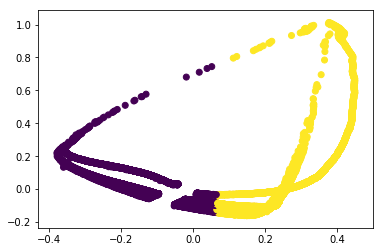

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = labels)